# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 3. Сравнение оценок и эффективные оценки
### Дедлайн --- 13 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.


В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека `scipy.stats`. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 15 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [1]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Задача 1

Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

In [2]:
color_for_normal=sns.color_palette("colorblind")[0]
color_for_laplace=sns.color_palette("colorblind")[1]
color_for_cauchy=sns.color_palette("colorblind")[2]

N=500

norm_distr = sps.norm()
laplacian_distr = sps.laplace()
cauchy_distr = sps.cauchy()
np.random.seed(2020)

norm_sample = norm_distr.rvs(size=N)
laplacian_sample = laplacian_distr.rvs(size=N)
cauchy_sample = cauchy_distr.rvs(size=N)

Постройте график плотности распределения для всех трех распределений на одних осях.

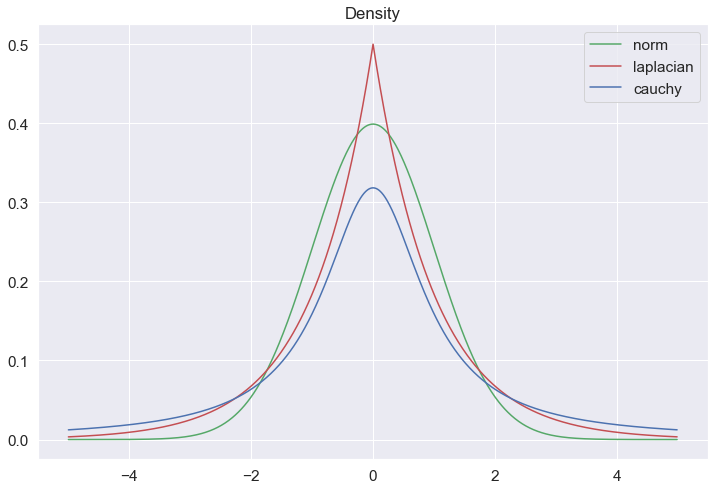

In [3]:
points = np.arange(-5, 5, 0.01)

plt.figure(figsize=(12, 8))
plt.plot(points, norm_distr.pdf(points), c='g', label="norm")
plt.plot(points, laplacian_distr.pdf(points), c='r', label='laplacian')
plt.plot(points, cauchy_distr.pdf(points), c='b', label='cauchy')

plt.title('Density')
plt.legend()
plt.show()

Подумайте для каких распределений сложнее найти значение математического ожидания по выборке? Почему?

**Ответ:** Для распределения Коши сложнее всего, так как его нет.

Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики.

In [4]:
import math

def truncated_mean(sample, alpha=0.3):
    return np.mean(np.sort(sample)[int(alpha * len(sample)): -int(alpha * len(sample))])

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Напишите функцию, которая это делает.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [5]:
from scipy.integrate import quad

def asymp_var(distr, alpha):
    quantile = distr.ppf(1 - alpha)
    res = 2 * ((alpha * quantile**2) + quad(lambda x: x**2 * distr.pdf(x), 0, quantile)[0]) / (1 - 2*alpha)**2
    return res

Постройте графики для фсимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`.

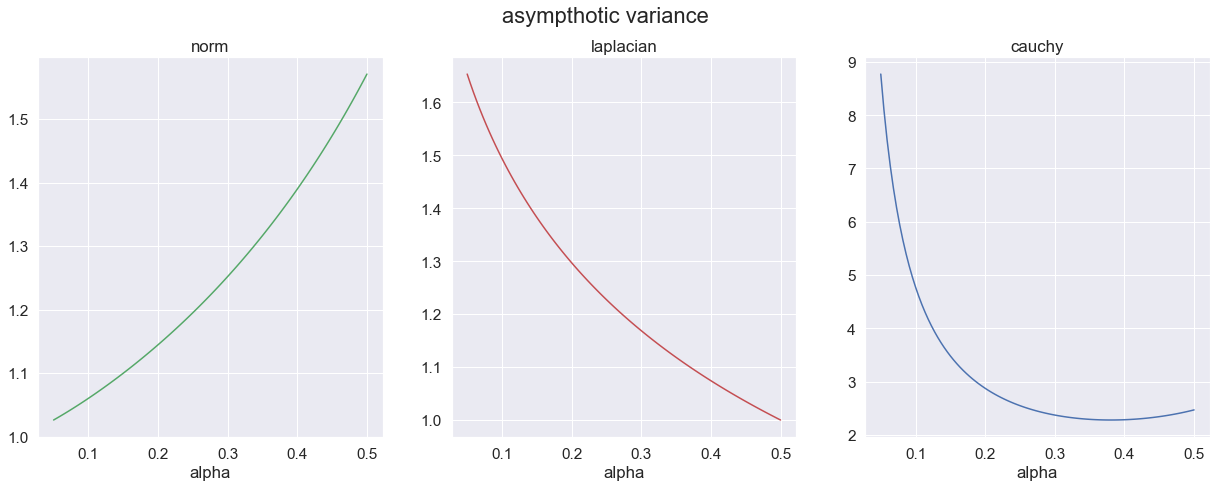

In [6]:
alpha_grid = np.linspace(0.05, 0.49999, 100)

fig, ax = plt.subplots(1, 3, figsize=(21,7))
fig.suptitle('asympthotic variance', size=22)
    
values = np.vectorize(lambda alpha: asymp_var(norm_distr, alpha))(alpha_grid)
ax[0].plot(alpha_grid, values, c='g')
ax[0].set_title('norm')
ax[0].set_xlabel('alpha')

values = np.vectorize(lambda alpha: asymp_var(laplacian_distr, alpha))(alpha_grid)
ax[1].plot(alpha_grid, values, c='r')
ax[1].set_title('laplacian')
ax[1].set_xlabel('alpha')

values = np.vectorize(lambda alpha: asymp_var(cauchy_distr, alpha))(alpha_grid)
ax[2].plot(alpha_grid, values, c='b')
ax[2].set_title('cauchy')
ax[2].set_xlabel('alpha')


plt.show()

Как можно интепретировать такой график? Напишите развернутый вывод.

*Подсказка.* Подумайте, какой известной оценке соответствует усеченное среднее порядка 0.5? А порядка 0?

**Ответ:**

Для 0.5 это медиана, для 0 это обычное среднее, график означает, что у нормального распределения оценка медианы хуже чем среднего, у распределения лапласа наоборот, у Коши почти как у Лапласа. Так как чем выше дисперсия, тем меньше точность оценки. 

Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [7]:
norm_median = np.vectorize(lambda i: np.median(norm_sample[:i]))(np.arange(1, N + 1))
laplacian_median = np.vectorize(lambda i: np.median(laplacian_sample[:i]))(np.arange(1, N + 1))
cauchy_median = np.vectorize(lambda i: np.median(cauchy_sample[:i]))(np.arange(1, N + 1))

norm_mean = np.vectorize(lambda i: np.mean(norm_sample[:i]))(np.arange(1, N + 1))
laplacian_mean = np.vectorize(lambda i: np.mean(laplacian_sample[:i]))(np.arange(1, N + 1))
cauchy_mean = np.vectorize(lambda i: np.mean(cauchy_sample[:i]))(np.arange(1, N + 1))

norm_tr_mean = np.vectorize(lambda i: truncated_mean(norm_sample[:i], 0.35))(np.arange(1, N + 1))
laplacian_tr_mean = np.vectorize(lambda i: truncated_mean(laplacian_sample[:i], 0.35))(np.arange(1, N + 1))
cauchy_tr_mean = np.vectorize(lambda i: truncated_mean(cauchy_sample[:i], 0.35))(np.arange(1, N + 1))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


**Нормальное распределение**

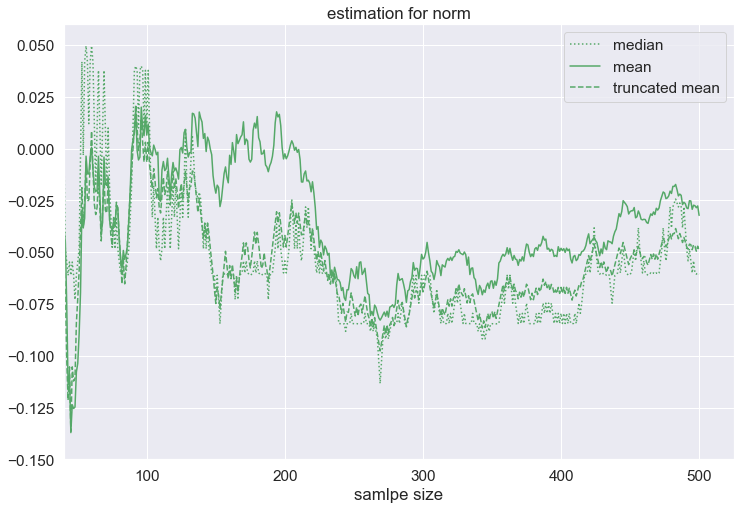

In [8]:
plt.figure(figsize=(12, 8))

plt.title('estimation for norm')
plt.plot(np.arange(1, N + 1), norm_median, ':', c='g', label='median')
plt.plot(np.arange(1, N + 1), norm_mean, c='g', label='mean')
plt.plot(np.arange(1, N + 1), norm_tr_mean, '--', c='g', label='truncated mean')

plt.xlim(40)
plt.ylim(-0.15, 0.06)
plt.xlabel('samlpe size')

plt.legend()
plt.show()

**Распределение Лапласа**

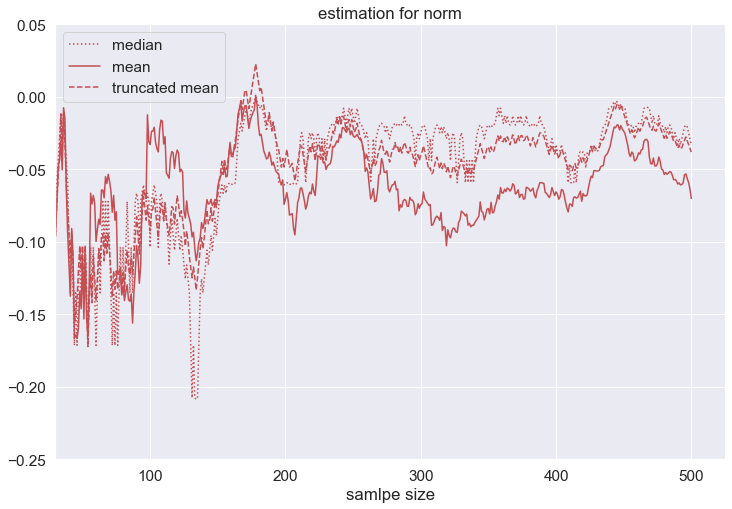

In [9]:
plt.figure(figsize=(12, 8))

plt.title('estimation for norm')
plt.plot(np.arange(1, N + 1), laplacian_median, ':', c='r', label='median')
plt.plot(np.arange(1, N + 1), laplacian_mean, c='r', label='mean')
plt.plot(np.arange(1, N + 1), laplacian_tr_mean, '--', c='r', label='truncated mean')

plt.xlim(30)
plt.ylim(-0.25, 0.05)
plt.xlabel('samlpe size')

plt.legend()
plt.show()

**Распределение Коши**

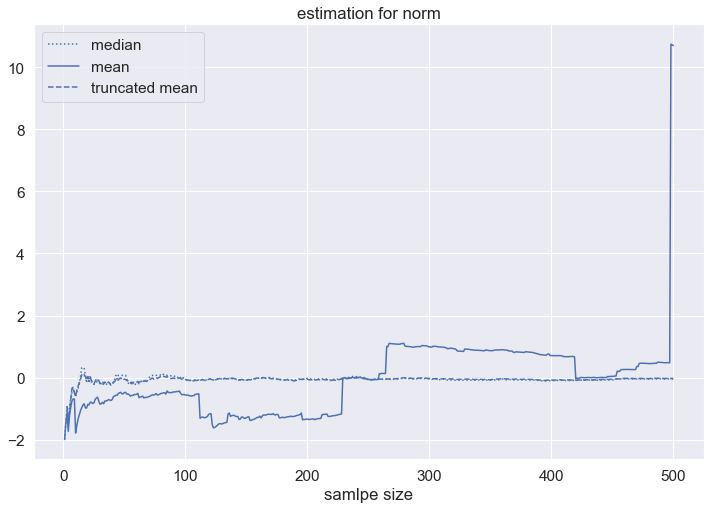

In [10]:
plt.figure(figsize=(12, 8))

plt.title('estimation for norm')
plt.plot(np.arange(1, N + 1), cauchy_median, ':', c='b', label='median')
plt.plot(np.arange(1, N + 1), cauchy_mean, c='b', label='mean')
plt.plot(np.arange(1, N + 1), cauchy_tr_mean, '--', c='b', label='truncated mean')

plt.xlabel('samlpe size')

plt.legend()
plt.show()

Как эти три графика соотносятся с графиками асимптотической дисперсии усеченного среднего для всех этих распределений? Сделайте вывод.

**Вывод:**
Соотносятся точно, среднее находится ближе к 0 чем медиана у нормального распределения и дальше для Лапласа и Коши. Таким образом, выяснили какая оценка лучше для каждого распредления. Кроме того, видно, что усеченное среднее находится между медианой и обычным средним для распределения Лапласа и нормального, а для Коши там же, где и медиана, что так же согласуется с графиками осимптотической дисперсии. 

# Задача 2

## Wine dataset

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье. 

In [11]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

Downloading...
From: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta
To: C:\Users\1\Desktop\прога\MIPT DS\Stats\winequality-red.csv

  0%|          | 0.00/101k [00:00<?, ?B/s]
100%|##########| 101k/101k [00:00<00:00, 50.5MB/s]


In [12]:
import pandas as pd

In [13]:
data = pd.read_csv("winequality-red.csv")

In [14]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [15]:
def category(x):
    if x <= 10:
        return "low alcohol"
    if x <= 12:
        return "medium alcohol"
    return "high alcohol"

data['category'] = data['alcohol'].apply(category)

Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [16]:
data.groupby('category')["residual sugar"].agg([np.mean, np.median])

,mean,median
category,,
high alcohol,2.760993,2.3
low alcohol,2.445984,2.1
medium alcohol,2.592264,2.2


Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:**
Чем выше содержание алкоголя, тем выше в смысле обоих средних содержание сахара.

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

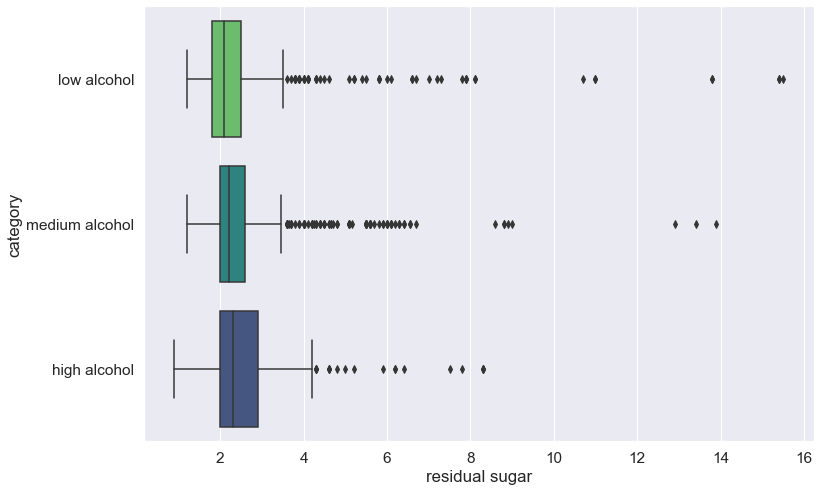

In [17]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]
plt.figure(figsize=(12, 8))

sns.boxplot(data=data, y='category', x='residual sugar', palette=palette)
plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медииану или среднее? Почему?

**Ответ:**
Графики соотносятся с оценками. Лучше использовать медиану, так как большое количество выбросов делает среднее не устойчивым. 

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

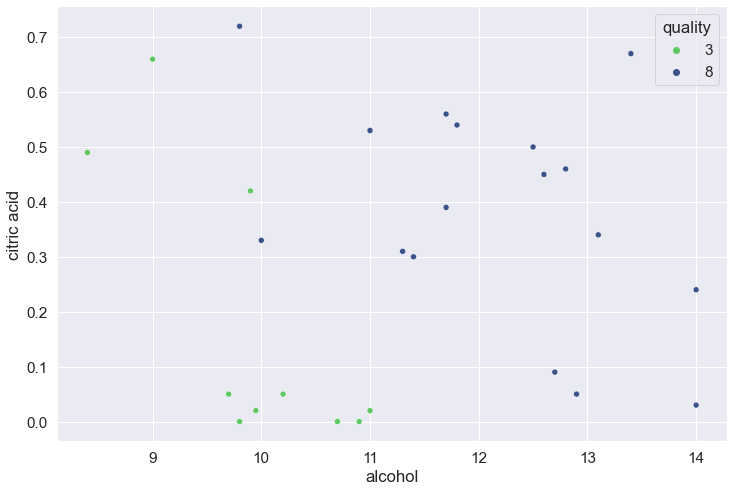

In [18]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=data[np.logical_or(data['quality'] == 3, data['quality'] == 8)],
                x='alcohol', 
                y='citric acid', 
                hue='quality', 
                palette=[palette[0]]+[palette[-1]]
               )

plt.show()

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [19]:
sample1 = data[data['quality'] == 8][['alcohol', 'citric acid']]
sample2 = data[data['quality'] == 3][['alcohol', 'citric acid']]

cov1 = np.cov(sample1['alcohol'], sample1['citric acid'])
cov2 = np.cov(sample2['alcohol'], sample2['citric acid'])

exp1 = np.mean(sample1)
exp2 = np.mean(sample2)

point_size = 1000

gridx = np.linspace(5, 15, point_size)
gridy = np.linspace(-0.3, 0.8, point_size)

grid = np.array([[x, y] for x in gridx for y in gridy]).reshape(point_size, point_size, 2)

dens1 = sps.multivariate_normal(mean=exp1, cov=cov1).pdf
dens2 = sps.multivariate_normal(mean=exp2, cov=cov2).pdf

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [20]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

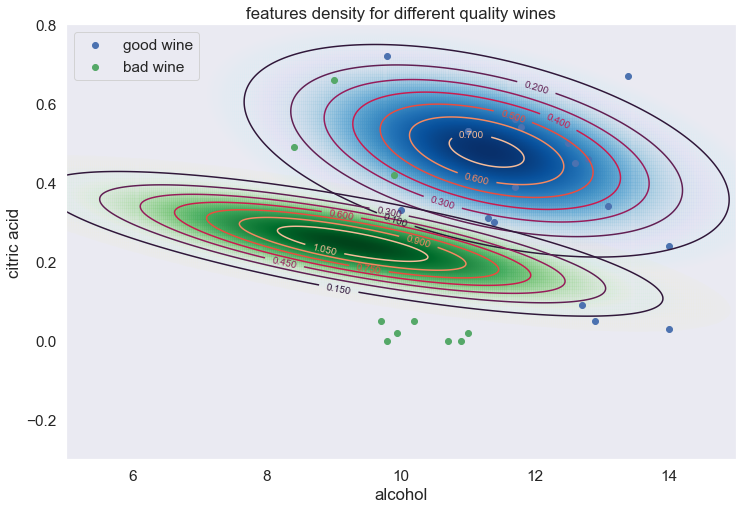

In [21]:
plt.figure(figsize=(12, 8))

plt.pcolormesh(gridx, gridy, dens1(grid), cmap=get_density_cmap("Blues"))
plt.pcolormesh(gridx, gridy, dens2(grid), cmap=get_density_cmap("Greens"))

plt.scatter(sample1['alcohol'], sample1['citric acid'], c='b', label='good wine')
plt.scatter(sample2['alcohol'], sample2['citric acid'], c='g', label='bad wine')

X, Y = np.meshgrid(gridx, gridy)

CS = plt.contour(X, Y, dens1(grid))
plt.clabel(CS)
CS = plt.contour(X, Y, dens2(grid))
plt.clabel(CS)

plt.title('features density for different quality wines')
plt.xlabel('alcohol')
plt.ylabel('citric acid')

plt.legend()
plt.show()

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:**
Можно сказать, что хорошее вино содержит большее содержание алкоголя и кислоты. При этом пропорция между этими характеристиками примерно та же.  
Также разброс синего облакого больше, что говорит о том хорошее вино труднее определить, чем крепкое.

# Задача 3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $\theta \in
    [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии
    произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. 

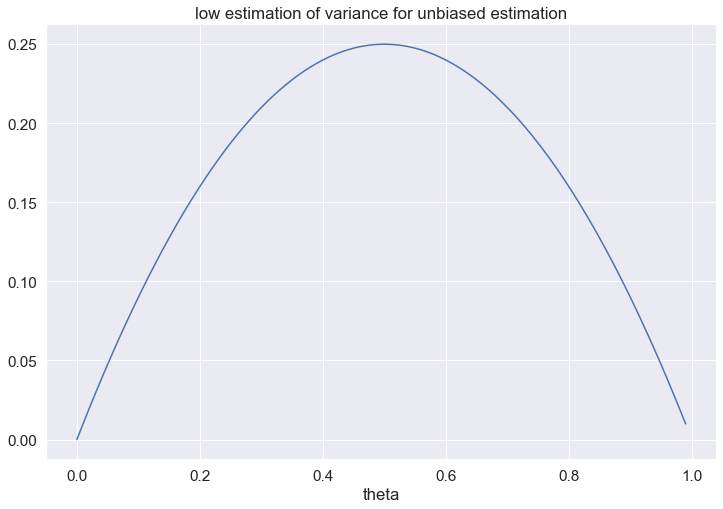

In [22]:
plt.figure(figsize=(12, 8))
points = np.arange(0, 1, 0.01)
plt.plot(points, points * (1 - points))

plt.title("low estimation of variance for unbiased estimation")
plt.xlabel('theta')
plt.show()

Какой можно сделать вывод (напишите в комментариях)?

**Вывод**
Нижняя оценка дисперсии равная 0 достигается в граничных точках и максимальна по середине,что в целом и логично, потому что дисперсия самого распределения будет выше в точке 0.5.

 Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (количество бутстрепных выборок равно $1000$) этой эффективной оценки $\theta$.

In [23]:
points = np.arange(0, 1, 0.01)
N = 1000
estims = []

for theta in points:
    bern_sample = sps.bernoulli.rvs(p=theta, size=N)
    index = np.random.randint(0, N, size=(N, N))
    bs = bern_sample[index]
    estimation = np.mean(np.mean(bs**2, axis=1) - np.mean(bs, axis=1)**2)
    estims.append(estimation)

 Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.

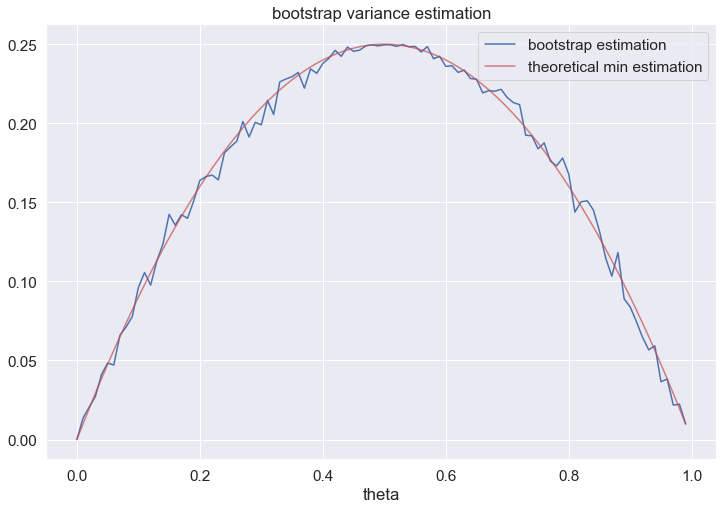

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(points, estims, color='b', label='bootstrap estimation')
plt.plot(points, points * (1 - points), color='r', label='theoretical min estimation', alpha=0.7)
plt.title("bootstrap variance estimation")
plt.xlabel('theta')
plt.legend()
plt.show()

**Вывод**

Оценка выборочным средним является эффективной, то есть достигается равенство Рао-Крамера. Это мы можем увидеть и на графиках теоретической и реальной оценки дисперсии, их значения очень близки для каждого параметра $\theta$. Таким образом, мы увидели, что получили оценку с минимальной теоритической дисперсией для каждого параметра $\theta$.